# <center> R3.08 - Probabilités <br> TP - Simulation probabiliste </center>
<center> A. Ridard </center>

In [1]:
# importation des modules
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt

**Remarque :** 
- Pour calculer les lois de probabilité (pmf ou pdf) et les fonctions de répartition (cdf), on utilisera scipy.stats (sps)
- Pour générer des tableaux de nombres aléatoires, on utilisera numpy.random (npr)

## Lois usuelles finies : le point de vue théorique

Dans cette partie, nous allons représenter graphiquement les trois lois usuelles finies vues en cours.

### Loi uniforme (sps.randint) sur $\{1,...,6\}$

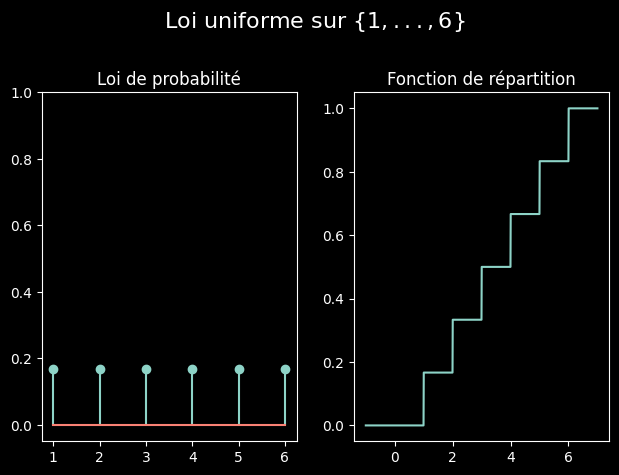

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.tight_layout(rect = [0, 0, 1, 0.85])
plt.suptitle('Loi uniforme sur $\{1,...,6\}$', fontsize=16)

ax1.set_title('Loi de probabilité')
ax1.set_ylim(-0.05, 1)
a = 1
b = 6
x = np.arange(a,b+1)
y = sps.randint.pmf(x, a, b+1)
ax1.stem(x, y)

ax2.set_title('Fonction de répartition')
x = np.linspace(-1, b+1, int(1e3))
y = sps.randint.cdf(x, a, b+1)
ax2.plot(x, y)

plt.show()

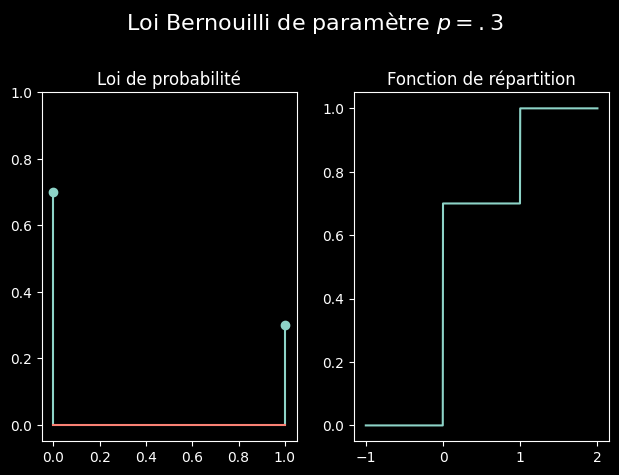

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.tight_layout(rect = [0, 0, 1, 0.85])
plt.suptitle('Loi Bernouilli de paramètre $p = .3$', fontsize=16)

ax1.set_title('Loi de probabilité')
ax1.set_ylim(-0.05, 1)
a = 0
b = 1
p = .3
x = np.arange(a,b+1)
y = sps.bernoulli.pmf(x, p)
ax1.stem(x, y)

ax2.set_title('Fonction de répartition')
x = np.linspace(-1, b+1, int(1e3))
y = sps.bernoulli.cdf(x, p)
ax2.plot(x, y)

plt.show()

### Loi de Bernoulli (sps.bernoulli) de paramètre $p = 0.3$

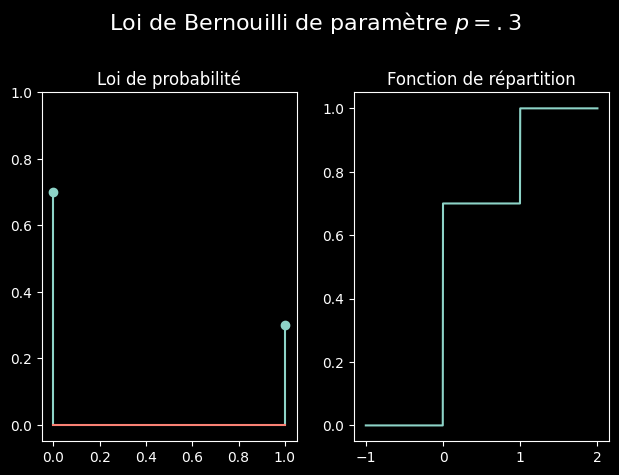

In [4]:
# Réponse
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.tight_layout(rect = [0, 0, 1, 0.85])
plt.suptitle('Loi de Bernouilli de paramètre $p=.3$', fontsize=16)

ax1.set_title('Loi de probabilité')
ax1.set_ylim(-0.05, 1)
p=.3
a = 0
b = 1
x = np.arange(a,b+1)
y = sps.bernoulli.pmf(x,p)
ax1.stem(x, y)

ax2.set_title('Fonction de répartition')
x = np.linspace(-1, b+1, int(1e3))
y = sps.bernoulli.cdf(x, p)
ax2.plot(x, y)

plt.show()

### Loi binomiale (sps.binom) de paramètres $n = 20$ et $p = 0.3$

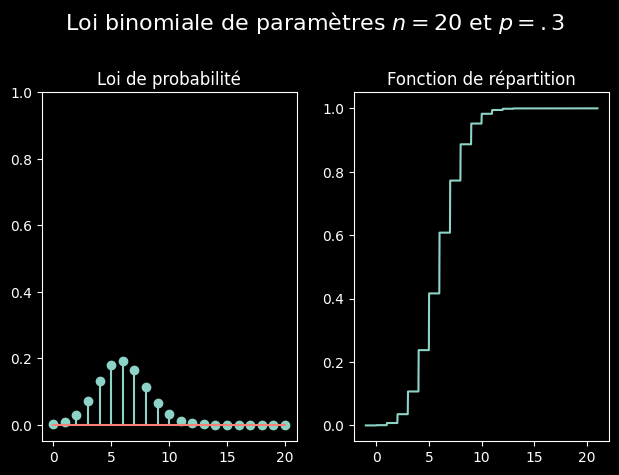

In [5]:
# Réponse
# Réponse
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.tight_layout(rect = [0, 0, 1, 0.85])
plt.suptitle('Loi binomiale de paramètres $n=20$ et $p=.3$', fontsize=16)

ax1.set_title('Loi de probabilité')
ax1.set_ylim(-0.05, 1)
p = .3
n = 20
a = 0
b = 20
x = np.arange(a,b+1)
y = sps.binom.pmf(x,n,p)
ax1.stem(x, y)

ax2.set_title('Fonction de répartition')
x = np.linspace(-1, b+1, int(1e3))
y = sps.binom.cdf(x,n,p)

ax2.plot(x, y)

plt.show()

## Lois usuelles finies : le point de vue empirique

Dans cette partie, nous allons effectuer nos premières simulations pour approcher les espérances vues en cours.

### Utilisation des générateurs fournis par numpy.random (npr)

> Pour chacune des lois suivantes :
- Simuler 100 réalisations à l'aide du générateur adapté
- Calculer la moyenne de ces 100 valeurs
- Comparer cette moyenne empirique avec la moyenne théorique (espérance) vue en cours

**Loi uniforme (npr.randint) sur $\{1,...,6\}$**

In [6]:
# Réponse
a=1
b=6
k=10000
emp_unif=npr.randint(a,b+1, size=k)
print(set(emp_unif))
emp_mean=sum(emp_unif)/k

print("la moyenne empirique est ", emp_mean, "tandis que la moyenne théorique est ", (a+b)/2)

{1, 2, 3, 4, 5, 6}
la moyenne empirique est  3.5024 tandis que la moyenne théorique est  3.5


**Loi de Bernoulli (npr.binomial) de paramètre $p = 0.3$**

In [7]:
# Réponse
p=.3
k=100
emp_unif=npr.binomial(1,p, size=k)
set(emp_unif)
emp_mean=sum(emp_unif)/k

print("la moyenne empirique est ", emp_mean, "tandis que la moyenne théorique est ", p)

la moyenne empirique est  0.32 tandis que la moyenne théorique est  0.3


**Loi binomiale (npr.binomial) de paramètres $n = 20$ et $p = 0.3$**

In [8]:
# Réponse
n=20
p=.3
k=1000
emp_unif=npr.binomial(n,p, size=k)
set(emp_unif)
emp_mean=sum(emp_unif)/k

print("la moyenne empirique est ", emp_mean, "tandis que la moyenne théorique est ", n*p)

la moyenne empirique est  6.091 tandis que la moyenne théorique est  6.0


### Définition de nos propres générateurs à partir de celui de la loi uniforme sur [0,1[ (npr.rand)

**Loi uniforme sur $\{1,...,6\}$**

> 
- A l'aide de **npr.rand**, définir une fonction **myRandint** qui génère un tableau de nombres aléatoires (selon la loi considérée)<br>
- Simuler 100 réalisations à l'aide de ce générateur
- Comparer la moyenne empirique avec la moyenne théorique

In [9]:
# Réponse
def myRandint(a=1,b=6,size=1):
    if size == 1:
        return int(a+np.floor(npr.random()*(b-a+1)))
    else:
        ret=np.zeros(size,int)
        for i in range(size):
            ret[i]=int(a+np.floor(npr.random()*(b-a+1)))
        return ret

k=1000
emp_unif=myRandint(1,6, size=k)
print(set(emp_unif))

emp_mean=sum(emp_unif)/k

print("la moyenne empirique est ", emp_mean, "tandis que la moyenne théorique est ", (a+b)/2)

{1, 2, 3, 4, 5, 6}
la moyenne empirique est  3.607 tandis que la moyenne théorique est  3.5


**Loi de Bernoulli de paramètre $p = 0.3$**

> 
- A l'aide de **npr.rand**, définir une fonction **myBernoulli** qui génère un tableau de nombres aléatoires (selon la loi considérée)<br>
- Simuler 100 réalisations à l'aide de ce générateur
- Comparer la moyenne empirique avec la moyenne théorique

In [10]:
# Réponse
def myBernoulli(p=.5,size=1):
    if size == 1:
        return int(npr.random()<p)
    else:
        ret=np.zeros(size,int)
        for i in range(size):
            ret[i]=int(npr.random()<p)
        return ret

k=1000
p=.3
emp_unif=myBernoulli(p, size=k)
print(set(emp_unif))

emp_mean=sum(emp_unif)/k

print("la moyenne empirique est ", emp_mean, "tandis que la moyenne théorique est ", p)

{0, 1}
la moyenne empirique est  0.292 tandis que la moyenne théorique est  0.3


**Loi binomiale de paramètres $n = 20$ et $p = 0.3$**

> 
- A l'aide de *myBernoulli*, définir une fonction **myBinomial** qui génère un tableau de nombres aléatoires (selon la loi considérée)<br>
- Simuler 100 réalisations à l'aide de ce générateur
- Comparer la moyenne empirique avec la moyenne théorique

In [11]:
# Réponse
def myBinomial(n,p=.5,size=1):
    if size == 1:
        return sum([myBernoulli(p) for i in range(n)])
    else:
        ret=np.zeros(size,int)
        for i in range(size):
            ret[i]=sum([myBernoulli(p) for i in range(n)])
        return ret

k=100000
p=.3
emp_unif=myBinomial(20,p, size=k)
print(set(emp_unif))

emp_mean=sum(emp_unif)/k

print("la moyenne empirique est ", emp_mean, "tandis que la moyenne théorique est ", n*p)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
la moyenne empirique est  6.00927 tandis que la moyenne théorique est  6.0


**Remarque :** on peut en fait simuler toutes les lois usuelles, même les lois continues, à l'aide de la seule loi uniforme sur [0,1[ !

## Loi Forte des Grands Nombres

Nous avons observé, pour trois lois usuelles finies, que la moyenne empirique (pour 100 réalisations) était proche de la moyenne théorique.<br>
En fait, ce résultat se généralise au travers du théorème de la Loi Forte des Grands Nombres (LFGN).

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
**Théorème (LFGN) :**<br>

Soit $X_i$ des v.a. indépendantes et de même loi (éventuellement inconnue) d'espérance $m$.<br />
Alors, la moyenne empirique converge (presque sûrement) vers la moyenne théorique :
$$\bar X_n=\displaystyle\frac{1}{n}\sum_{i=1}^{n}X_i\xrightarrow[n\to+\infty]{(p.s.)}m$$

*En pratique, on considère que la moyenne empirique (pour $n$ assez grand) est proche de la moyenne théorique*

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

> Ecrire un script permettant d'illustrer ce théorème de la manière suivante, par exemple avec les $X_i$ de loi uniforme sur [0,1[. 
<img src="LFGN.png" width="400">

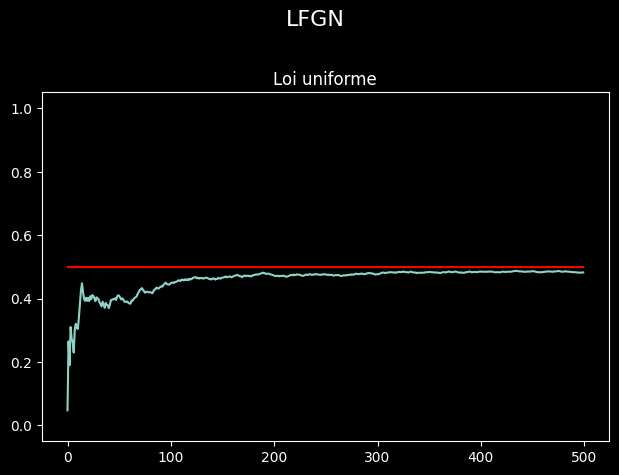

In [12]:
# Réponse
def plotLFGN(n):
    fig, (ax1) = plt.subplots(1, 1)
    plt.tight_layout(rect = [0, 0, 1, 0.85])
    plt.suptitle('LFGN', fontsize=16)

    ax1.set_title('Loi uniforme')
    ax1.set_ylim(-0.05, 1.05)
    x=np.arange(n)
    mean_theo=np.ones(n)*.5
    mean_emp=np.zeros(n)
    mean_emp[0]=npr.random()
    sum=mean_emp[0]
    for i in range(1,n):
        rand=npr.random()
        sum=sum+rand
        mean_emp[i]=sum/(i+1)
        
    plt.plot(x,mean_emp)
    plt.plot(x,mean_theo,'r',)
    
plotLFGN(500)

**Remarque :** si les $X_i\sim \mathcal B(p)$, alors la LFGN légitime l'approximation d'une probabilité par une fréquence empirique ! 

> Justifier cette remarque

*Réponse :*

La remarque suggère qu'une suite de variables aléatoires $X_i$ suivant une loi binomiale $\mathcal B(p)$ peut être approximée par sa fréquence empirique grâce à la Loi Forte des Grands Nombres (LFGN). Justifions cette remarque :

### Justification

Lorsque les $X_i$ sont des variables aléatoires indépendantes et identiquement distribuées (i.i.d) suivant une loi binomiale de paramètre $p$ (noté $X_i \sim \mathcal B(p)$), l'espérance (ou moyenne théorique) de cette distribution est $m = p$.

La moyenne empirique $\bar X_n$ de $n$ réalisations de $X_i$ est définie comme :
$$ \bar X_n=\frac{1}{n}\sum_{i=1}^{n}X_i $$

Selon la LFGN, si les $X_i$ sont i.i.d et possèdent une espérance finie (ce qui est le cas ici), alors la moyenne empirique converge presque sûrement vers l'espérance théorique quand $n$ tend vers l'infini :
$$ \bar X_n \xrightarrow[n\to+\infty]{(p.s.)}m $$
$$ \Rightarrow \frac{1}{n}\sum_{i=1}^{n}X_i \xrightarrow[n\to+\infty]{(p.s.)}p $$

Dans le contexte de la loi binomiale $\mathcal B(p)$, $p$ est la probabilité de succès (obtenir 1) à chaque essai. Ainsi, la LFGN nous dit que la moyenne empirique des réalisations (qui est la fréquence empirique des succès) converge vers la probabilité théorique de succès $p$ quand le nombre d'essais $n$ est suffisamment grand. 

### Implication Pratique

Cela signifie qu'en pratique, si nous faisons un grand nombre d'essais de Bernoulli (i.e., des essais avec deux issues possibles, succès ou échec), la fréquence empirique de succès est une bonne approximation de la probabilité réelle de succès. C'est-à-dire que la proportion observée de succès dans un grand échantillon est proche de la probabilité théorique de succès. Cette propriété est fréquemment utilisée dans les expérimentations et les simulations statistiques.

### Exemple 

Si nous lançons une pièce (biaisée) dont la probabilité d'obtenir face est $p$, et si nous lançons cette pièce un grand nombre de fois ($n$), alors la proportion observée de faces ($\bar X_n$) devrait être proche de $p$ selon la LFGN.

### Conclusion

La LFGN est fondamentale en statistiques et sciences des données, elle fournit une base solide pour l'inférence statistique et la modélisation, et elle est largement utilisée pour justifier l'utilisation de la moyenne empirique comme estimateur de l'espérance théorique.

## Applications de la LFGN

### Résoudre un problème probabiliste par la simulation

> Résoudre par simulation le problème de Monty Hall (cf. cours), autrement dit :
- Simuler un grand nombre de "parties" (disons 100) avec les deux stratégies possibles.<br>
*Pour chacune des stratégies, on notera 1 si la partie est gagnée et 0 sinon*
- Calculer alors, pour chacune des stratégies, la fréquence empirique des parties gagnées.<br>
*Souvenez-vous, elle doit être proche de $\frac{2}{3}$ lorsque le joueur décide de changer d'avis, et proche de $\frac{1}{3}$ sinon.*

0
1.0
1.0


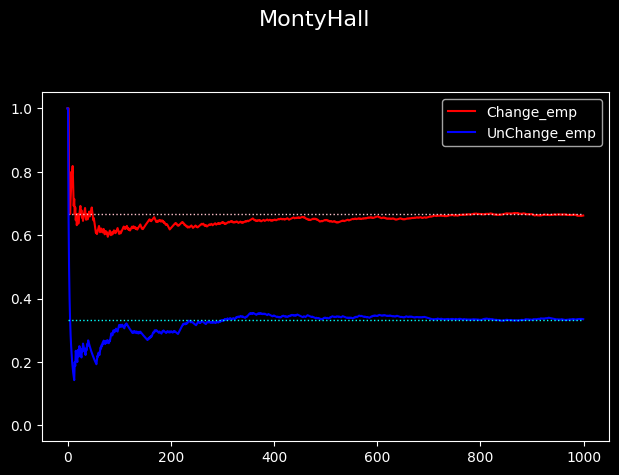

In [13]:
def MontyChange():
    voit=myRandint(1,3)
    choix=myRandint(1,3)
    if voit==choix:
        return 0
    else :
        return 1
        
print(MontyChange())

def MontyUnChange():
    voit=myRandint(1,3)
    choix=myRandint(1,3)
    
    if voit==choix:
        return 1
    else :
        return 0
        
def empMean(fct,n):

    mean_emp=np.zeros(n)
    mean_emp[0]=fct()
    print(mean_emp[0])
    for i in range(1,n):
        rand=fct()
        mean_emp[i]=(i*mean_emp[i-1]+rand)/(i+1)
        
    return(mean_emp)
        
        
fig, (ax1) = plt.subplots(1, 1)
plt.tight_layout(rect = [0, 0, 1, 0.85])
plt.suptitle('MontyHall', fontsize=16)

ax1.set_ylim(-0.05, 1.05)

n=1000
x=np.arange(n)
y=np.ones(n)
empChange=empMean(MontyChange,n)
empUnChange=empMean(MontyUnChange,n)

plt.plot(x,empChange,'r',label='Change_emp')
plt.plot(x,y*2/3, linestyle='dotted', linewidth=1, color="pink")
plt.plot(x,empUnChange,'b',label='UnChange_emp')
plt.plot(x,y*1/3, linestyle='dotted', linewidth=1, color="cyan")
plt.legend(loc='best')

plt.show()

### Approcher une loi théorique par sa loi empirique

**Dans le cas discret**

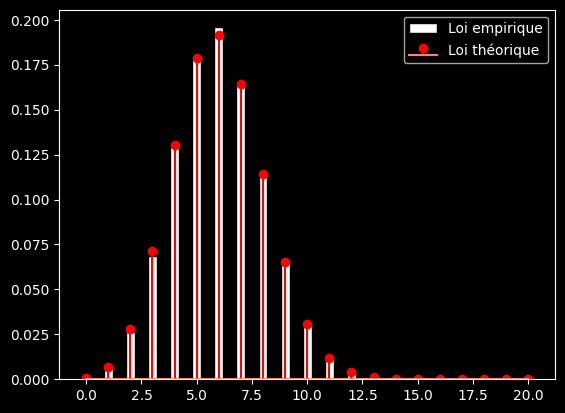

In [14]:
# paramètres de la binomiale
n, p = 20, 0.3 

# loi théorique
x = np.arange(n+1)
yTh = sps.binom.pmf(x, n, p)
plt.stem(x, yTh, 'r', label='Loi théorique')

# loi empirique
N = int(1e4)
yEmp = npr.binomial(n, p ,N)
plt.hist(yEmp, bins=n+1, density=1, range=(-0.5,n+0.5), rwidth=0.4, edgecolor='black', color='white', label='Loi empirique')

plt.legend()
plt.show()

> Ecrire un script permettant de vérifier vos fonctions myRandint, myBernoulli et myBinomial.

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}


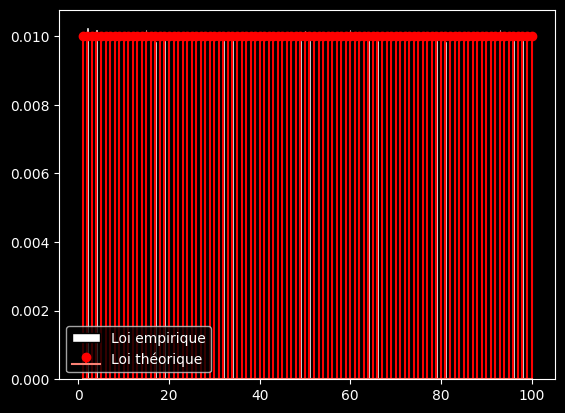

In [15]:
# Réponse
# paramètres de la loi uniforme discrète
a,b = 1,100

# loi théorique
n=b-a+1
x = np.arange(a,b+1)
yTh = sps.randint.pmf(x, a,b+1)
plt.stem(x, yTh, 'r', label='Loi théorique')

# loi empirique
N = int(1e6)
yEmp = myRandint(a,b,N)
print(set(yEmp))
plt.hist(yEmp, bins=n, density=1, range=(1-0.5,n+0.5), rwidth=0.5, edgecolor='black', color='white', label='Loi empirique')

plt.legend()
plt.show()

**Dans le cas continu**

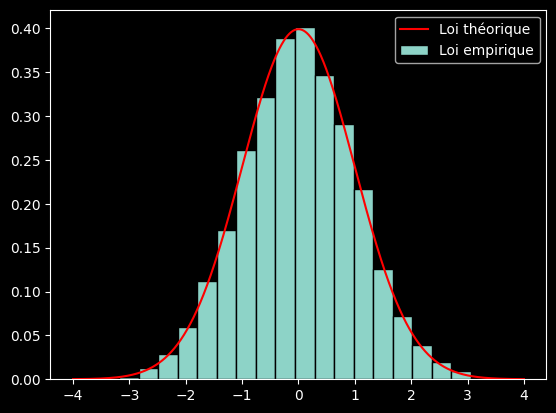

In [18]:
# loi théorique
x = np.linspace(-4, 4, 1000)
yTh = sps.norm.pdf(x)
plt.plot(x, yTh, 'r', label='Loi théorique')

# loi empirique
N = int(1e4)
nbCl = int(N**(1/3))
yEmp = npr.randn(N)
plt.hist(yEmp, bins=nbCl, density=True, edgecolor='black', label='Loi empirique')

plt.legend(loc='best')
plt.show()

## Théorème Central Limite

Nous savons maintenant (LFGN) que la moyenne empirique (pour $n$ assez grand) est "proche" de la moyenne théorique, mais comment se distribue-t-elle ? <br>
Autrement dit, si l'on calcule plusieurs moyennes empiriques (pour un même $n$ assez grand), comment se répartissent-elles autour de la moyenne théorique ?<br>
C'est le Théorème Central Limite (TCL) qui répond à cette question.

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------
**Théorème (TCL) :**<br>

Soit $X_i$ des v.a. indépendantes et de même loi (éventuellement inconnue) d'espérance $m$ et d'écart-type $\sigma$.<br />
Alors, la moyenne empirique centrée réduite converge (en loi) vers la gaussienne centrée réduite :
$$\displaystyle\frac{\bar X_n-m}{\frac{\sigma}{\sqrt{n}}}\xrightarrow[n\to +\infty]{\mathcal L}\mathcal N(0,1)$$

*En pratique, on considère que la loi de la moyenne empirique centrée-réduite est proche de la loi normale centrée-réduite.*

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------

> Ecrire un script permettant d'illustrer ce théorème de la manière suivante, par exemple avec les $X_i$ de loi uniforme sur [0,1[.
<img src="TCL.png" width="400">

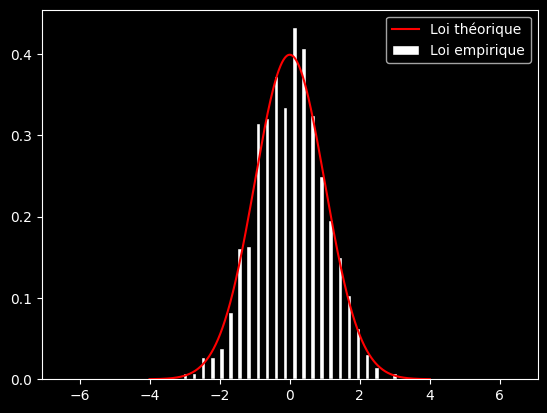

In [17]:
# Réponse

# loi théorique
a=1
b=6
n=b-a+1
x = np.linspace(-4, 4, 1000)
yTh = sps.norm.pdf(x)
plt.plot(x, yTh, 'r', label='Loi théorique')

# loi empirique

def TCL_unif(a,b,N):
    return (sum(myRandint(a,b,N)) - N*(b+a)/2)/(np.sqrt(((b-a+1)**2-1)/12 * N))
N = 2*int(1e3)
nbCl = 50 ##int(N**(1/3))

yEmp = [TCL_unif(a,b,N) for i in range(N)]
##print((yEmp))
plt.hist(yEmp, bins=nbCl, density=1, range=(-n-.5,n+0.5), rwidth=0.5, edgecolor='black', color='white', label='Loi empirique')

plt.legend()
plt.show()

**Remarque :** le TCL est à la base de la statistique inférentielle qui sera présentée en R5.C.09 dans le parcours C